In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [14]:
df=pd.read_csv('/kaggle/input/titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Drop rows with missing Fare
df = df.dropna(subset=['Fare'])

In [18]:
# Step 2: Data Inspection
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [19]:
#  5. Handling Missing Data

# Example: Fill numeric with median, categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column]=df[column].fillna(df[column].mode()[0])
    else:
        df[column]=df[column].fillna(df[column].median())

# Check again
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary columns
label_enc = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        df[column] = label_enc.fit_transform(df[column])

# One-Hot Encoding for remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,False,...,False,False,False,False,False,False,False,False,False,True


In [22]:
y = df['Fare']
X = df[['Pclass', 'Sex', 'Age', 'Embarked_Q','Embarked_S']]

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [28]:
# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.35148732202698585
MSE: 1003.5277264721132


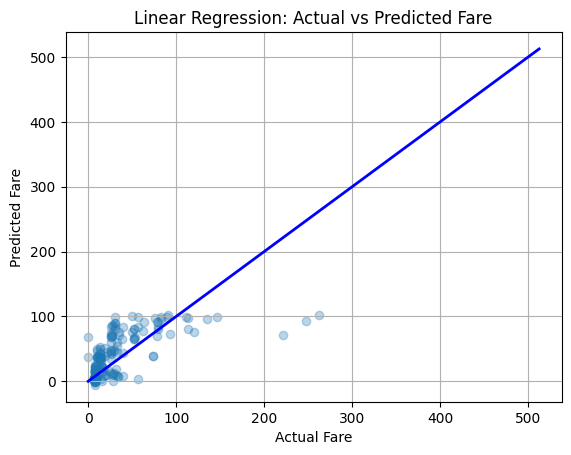

In [30]:
# Plot
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()],color='blue', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Linear Regression: Actual vs Predicted Fare')
plt.grid(True)
plt.show()